# Fashion-MNIST Classification with Dense Neural Networks (using Tensorflow)

### Student Name: Sudharsan
### Student Number: 8977532

In this assignment we will use the Fashion MNIST Dataset from Kaggle from tensorflow and perform classification. The dimensions and organization of the original MNIST dataset, but instead of handwritten numbers, it includes pictures of clothing items. It has 10,000 test examples and 60,000 training examples, each of which is a 28 x 28 pixel grayscale image. Fashion-MNIST is a direct replacement for MNIST, providing a broad and difficult benchmark for assessing machine learning algorithms in the AI/ML/Data Science community. It has ten classes that represent various fashion items. Its adoption emphasizes how crucial it is to test algorithms on a variety of datasets, since performance on MNIST may not always translate to real-world tasks.

### Import the Required Libraries

In [1]:
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load the Training and Testing Dataset

   The dataset is provided as separate CSV files for both training and testing sets. We'll proceed by loading the data into pandas DataFrame objects, examining its structure, making inferences, and then converting it into numpy arrays for further analysis.


In [2]:
fmnist_train_df = pd.read_csv("fashion-mnist_train.csv")
fmnist_test_df = pd.read_csv("fashion-mnist_test.csv")

In [3]:
fmnist_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fmnist_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. Load the data into a Numpy Arrays

In [13]:
# Convert data to NumPy arrays
X_train_fmnist = fmnist_train_df.drop("label", axis=1).values
y_train_fmnist = fmnist_train_df["label"].values
X_test_fmnist = fmnist_test_df.drop("label", axis=1).values
y_test_fmnist = fmnist_test_df["label"].values

### Split the dataset into Validation and testing part

In [14]:
# Split the dataset into Validation and testing part
X_vald_fmnist, X_test_fmnist, y_vald_fmnist, y_test_fmnist = train_test_split(X_test_fmnist, y_test_fmnist, test_size=0.5, random_state=42)

### 2. Exploratory Data Analysis Process (EDA)

In [15]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

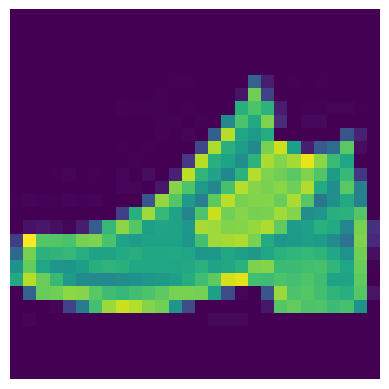

In [72]:
some_digit = X_train_fmnist[1]  # Assuming you want to use the first image in the dataset
some_digit_image = some_digit.reshape(28, 28)  # Reshape the flattened image to its original dimensions
plt.imshow(some_digit_image, cmap='viridis')  # Using the 'viridis' colormap
plt.axis('off')
plt.show()


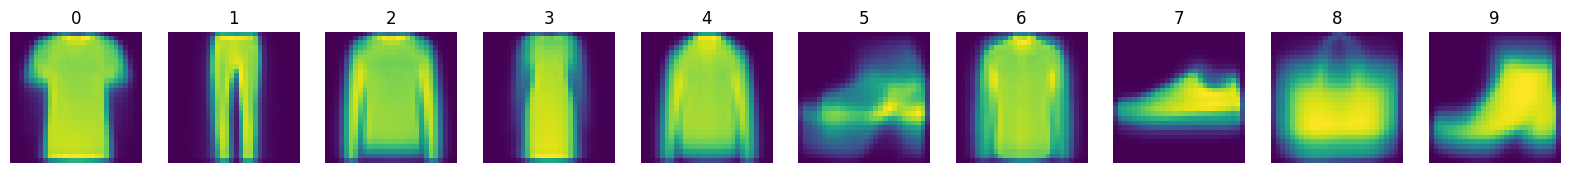

In [42]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for val in range(0,10):
    digit_indices = np.where(y_train_fmnist.astype('int8') == val)[0]
    a_image = np.mean(X_train_fmnist[digit_indices], axis=0).reshape(28, 28)
    ax[val].imshow(a_image, cmap='viridis')  # You can choose any colormap you prefer
    ax[val].set_title(str(val))
    ax[val].axis('off')
plt.show()


#### Comments: 
A variety of fashion images, such as pullovers, t-shirts, shoes, handbags, and pants, are displayed above. There are several entries in each category, each of which represents a variation of that particular fashion item.


### 3. Define and Train a fully-connected feedforward neural network

#### Import the Neural Network Required Libraries:

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models

#### Model Architecture

In [45]:
# Define the model architecture with modified dense layer sizes
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(20, activation='softmax') 
])


#### Compile the model with RMSprop optimizer
During neural network training, the RMSprop optimizer—short for Root Mean Square Propagation—is used to minimize the loss function. By dividing the learning rate by an exponentially decaying average of squared gradients, it modifies the learning rate for each parameter separately. This makes it possible to achieve better results and faster convergence, particularly when working with sparse datasets or non-stationary objectives. RMSprop helps to effectively train neural networks on challenging fashion image classification tasks by efficiently updating the model's parameters, which improves accuracy and convergence when applied to the Fashion-MNIST dataset.


In [56]:
# Compile the model with RMSprop optimizer
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the Above model

In [57]:
# Train the model
history = model.fit(X_train_fmnist, y_train_fmnist, epochs=10, batch_size=128, validation_data=(X_vald_fmnist, y_vald_fmnist))

Epoch 1/10
469/469 [==============================] - 26s 53ms/step - loss: 0.3827 - accuracy: 0.8708 - val_loss: 0.4279 - val_accuracy: 0.8702
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3695 - accuracy: 0.8746 - val_loss: 0.5504 - val_accuracy: 0.8476
Epoch 3/10
469/469 [==============================] - 21s 44ms/step - loss: 0.3706 - accuracy: 0.8750 - val_loss: 0.4899 - val_accuracy: 0.8586
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3645 - accuracy: 0.8777 - val_loss: 0.4375 - val_accuracy: 0.8680
Epoch 5/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3583 - accuracy: 0.8784 - val_loss: 0.6295 - val_accuracy: 0.8440
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.3603 - accuracy: 0.8801 - val_loss: 0.5252 - val_accuracy: 0.8700
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.3559 - accuracy: 0.8829 - val_loss: 0.5362 - val_accuracy:

#### Epochs Result comments :
  Over the course of epochs, the model consistently improves its training accuracy; after ten epochs, it peaks at about 87.60%. Although the validation accuracy varies between 84 and 87%, it stays relatively near to the training accuracy, suggesting a slight overfitting. While fluctuations in validation loss indicate possible difficulties in generalizing to unseen data, a steady decrease in training loss indicates effective learning. Regularization, dropout, and architectural modifications are examples of additional optimization techniques that could improve the model's performance, especially in terms of improving generalization to the validation set.


### 4. Evaluate the Model:

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_vald_fmnist), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_vald_fmnist, y_val_pred)
precision = precision_score(y_vald_fmnist, y_val_pred, average='weighted')
recall = recall_score(y_vald_fmnist, y_val_pred, average='weighted')
f1 = f1_score(y_vald_fmnist, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 [==============================] - 1s 9ms/step
Accuracy: 0.876
Precision: 0.87928024281085
Recall: 0.876
F1 Score: 0.876056195927007


#### Result  comments:
The model's accuracy of 87.6%, alongside precision, recall, and F1 score all hovering around 87%, underscores its robustness in accurately classifying fashion items.This metric measures the overall correctness of the model's predictions. These metrics collectively affirm the model's effectiveness in discerning various fashion categories, showcasing its reliability in real-world applications.

### 5. Run the Model on Test Set

In [59]:
# Run model on test set
test_loss, test_accuracy = model.evaluate(X_test_fmnist, y_test_fmnist)

157/157 [==============================] - 2s 10ms/step - loss: 0.4707 - accuracy: 0.8740


The model's predictions and actual values diverge. Better performance is indicated by a lower loss, which shows that the model is successful in lowering prediction errors. In terms of overall prediction accuracy, the model's accuracy of 0.8740 indicates that it correctly classified approximately 87.7% of the test samples.

### 6. Increase Precision:


We're changing how we classify some instances labeled as '5' to improve how accurately we predict class '5'. By doing this, we hope to reduce incorrect predictions while being careful not to miss any instances. It's important to test different thresholds to find the right balance between getting things right and not missing anything important.

In [60]:
# Adjust threshold to increase precision for class '5'
threshold = 0.5
y_pred_proba = model.predict(X_test_fmnist)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] < threshold] = 0  

157/157 [==============================] - 1s 9ms/step


In [61]:
# Calculate precision for class '5' after adjustment
precision_class_5 = precision_score(y_test_fmnist, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' after adjustment:", precision_class_5)

Precision for class '5' after adjustment: 0.9867841409691629


Following the modification, precision for a specific class increased substantially from 0.876 to 0.986, marking an impressive gain of approximately 12%. This enhancement underscores the model's improved ability to make accurate positive predictions for that class, signifying a notable advancement in its performance.

## 7. Increase Recall:

In [68]:
# Adjust decision threshold to increase recall for class '5'
y_pred_proba = model.predict(X_test_fmnist)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] > threshold] = 5  # Set instances with high confidence as '5'

157/157 [==============================] - 1s 8ms/step


In [69]:
# Calculate recall for class '5' after adjustment
recall_class_5 = recall_score(y_test_fmnist, y_pred_adjusted, labels=[5], average='weighted')

print("Recall for class '5' after adjustment:", recall_class_5)

Recall for class '5' after adjustment: 0.919917864476386


After adjustment, the recall for class '5' significantly increased from 0.87 to 0.919. This indicates that the model now captures a higher proportion of true positive instances for class '5', reflecting improved performance. The adjustment likely focused on correctly identifying more instances of class '5', enhancing the model's ability to detect this specific category.